## Feature scaling and Learning Rate (Multi-variable)

### 1 Tools

In [1]:
import copy, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 2. Problem Statement
- admission prediction
- X variables: GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Research
- Y variable: Chance of Admit

In [2]:
admission_df = pd.read_csv("~/Downloads/prediction of Graduate Admissions/Admission_Predict_Ver1.1.csv")
admission_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
#x_train is the input variable
#y_train is the target
admission_df.columns
x_train = admission_df.drop(columns=['Chance of Admit '])
y_train = admission_df['Chance of Admit ']
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train =      Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
495         496        332          108                  5  4.5   4.0  9.02   
496         497        337          117                  5  5.0   5.0  9.87   
497         498        330          120                  5  4.5   5.0  9.56   
498         499        312          103                  4  4.0   5.0  8.43   
499         500        327          113                  4  4.5   4.5  9.04   

     Research  
0           1  
1        

### Plot

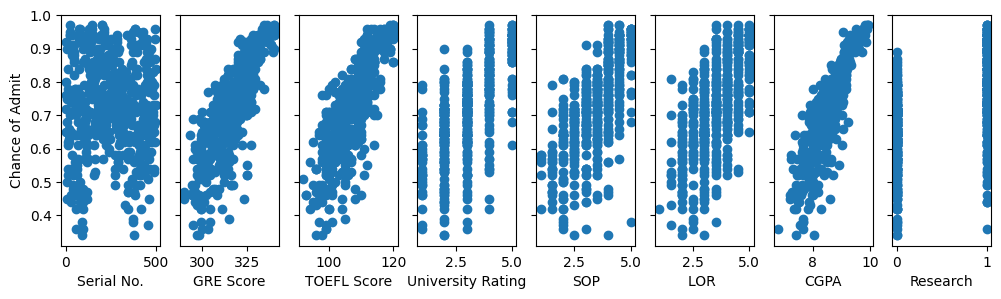

In [8]:
fig,ax=plt.subplots(1, 8, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train.iloc[:,i],y_train)
    ax[i].set_xlabel(x_train.columns[i])
ax[0].set_ylabel("Chance of Admit")
plt.show()

### 3. Feature Scaling
- aim for about -1 $<=$ $x_{j}$ $<=$ 1 for each feature $x_{j}$

1) Mean normalization
    $x_i := \dfrac{x_i - \mu_i}{max - min} $ 
2)  Z-score normalization
    $$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j} \tag{4}$$
   where $j$ selects a feature or a column in the $\mathbf{X}$ matrix. $µ_j$ is the mean of all the values for feature (j) and $\sigma_j$ is the standard deviation of feature (j).

In [10]:
def zscore_normalize_features(X):
    """
    Computes X, z-score normalized by column using pandas.
    
    Args:
      X (pd.DataFrame)     : input data, m examples, n features
      
    Returns:
      X_norm (pd.DataFrame): input normalized by column
      mu (pd.Series)       : mean of each feature
      sigma (pd.Series)    : standard deviation of each feature
    """
    # Find the mean of each column/feature
    mu = X.mean(axis=0)  # mu will be a pd.Series of shape (n,)
    
    # Find the standard deviation of each column/feature
    sigma = X.std(axis=0)  # sigma will be a pd.Series of shape (n,)
    
    # Element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma  # Result is a pd.DataFrame
    
    return X_norm, mu, sigma

In [13]:
#normalize the original features
x_norm, x_mu, x_sigma = zscore_normalize_features(x_train)
print(f"X_mu = {x_mu}, \nX_sigma = {x_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(x_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(x_norm,axis=0)}")

X_mu = Serial No.           250.50000
GRE Score            316.47200
TOEFL Score          107.19200
University Rating      3.11400
SOP                    3.37400
LOR                    3.48400
CGPA                   8.57644
Research               0.56000
dtype: float64, 
X_sigma = Serial No.           144.481833
GRE Score             11.295148
TOEFL Score            6.081868
University Rating      1.143512
SOP                    0.991004
LOR                    0.925450
CGPA                   0.604813
Research               0.496884
dtype: float64
Peak to Peak range by column in Raw        X:Serial No.           499.00
GRE Score             50.00
TOEFL Score           28.00
University Rating      4.00
SOP                    4.00
LOR                    4.00
CGPA                   3.12
Research               1.00
dtype: float64
Peak to Peak range by column in Normalized X:Serial No.           3.453721
GRE Score            4.426679
TOEFL Score          4.603849
University Rating    3.49799